In [4]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import string
import warnings
import missingno
warnings.filterwarnings('ignore')


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
# from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt



cf.go_offline(connected = True)


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
# from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt
import missingno


cf.go_offline(connected = True)


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import string
import warnings
import missingno

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 이제 각 변수를 원하는 목적에 맞게 변화시켰으므로, 이를 활용하여 시각화를 시켜서 실제 영향이 있는지 없는지 파악을 해보자.

In [5]:
# df_물품_입찰공고_내역_3 =  pd.read_csv('Project_01_27_EDA_물품_0_test.csv',encoding='cp949').iloc[:,1:]

# df_물품_입찰공고_내역_3 = pd.read_csv('Project_01_27_EDA_물품_test.csv',encoding='cp949').iloc[:,1:] # test 실행시

In [6]:
df_물품_입찰공고_내역_3.shape

(110857, 19)

In [7]:
df_물품_입찰공고_내역_3.head()

,공고게시일자,등록유형,조달구분,입찰공고차수,수요기관코드,세부품명내용,합계수량,합계수량_여부,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,재입찰허용여부,낙찰자결정방법,입찰계약방법,업종제한내용,지역제한내용,국제입찰여부
0,2021-01-02,나라장터(G2B),자체조달,0,C135546,41,1.0,1,N,N,N,26400000.0,전자입찰,Y,제한적최저가,수의(총액),N,N,N
1,2021-01-04,나라장터(G2B),자체조달,1,3910000,55,528000.0,1,Y,N,Y,123636363.0,전자입찰,N,협상에 의한 낙찰자 결정,일반(총액),Y,N,N
2,2021-01-04,나라장터(G2B),자체조달,2,4250000,55,264000.0,1,N,N,Y,63017272.0,전자입찰,Y,제한적최저가,수의(총액),N,Y,N
3,2021-01-04,나라장터(G2B),중앙조달,0,Z003311,39,1.0,1,기한존재,N,N,132744545.0,전자시담,Y,수의,수의(총액),N,N,N
4,2021-01-04,나라장터(G2B),자체조달,0,7008045,41,13.0,1,N,N,N,65272727.0,전자입찰,Y,제한적최저가,수의(총액),N,Y,N


In [8]:
test = df_물품_입찰공고_내역_3[['등록유형','추정가격']].copy()

In [9]:
test['등록유형'].value_counts().iplot('bar',title = '등록유형에 따른 입찰공고 건수')

In [10]:
test.groupby('등록유형').sum().iplot(kind = 'bar',title = '등록유형에 따른 배정예산의 총합')

In [11]:
test.groupby('등록유형').mean().iplot(kind = 'bar',title = '등록유형에 따른 입찰공고당 배정예산평균')


### 전체적으로, 나라장터에서 총 입찰공고건수와 총 배정 금액이 많지만, 입찰공고당 평균 배정 금액은 자체전자조달시스템이 더 많다.
### 여기서 우리는 자체전자조달 시스템에서 입찰공고를 올리는 건수는 적지만, 각 공고당 금액이 평균적으로 나라장터보다는 크다는 것을 알 수 있다.

In [12]:
test = df_물품_입찰공고_내역_3[['입찰공고차수','추정가격']].copy()

In [13]:
test['입찰공고차수'].value_counts()

0     98351
1     10805
2      1171
3       260
4       135
5        62
6        43
7        15
8         5
9         4
10        3
12        1
11        1
19        1
Name: 입찰공고차수, dtype: int64

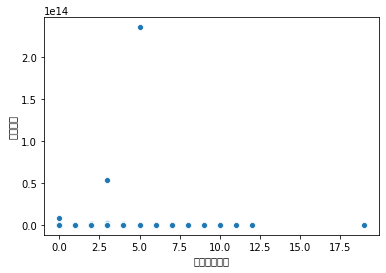

In [14]:
sns.scatterplot(x=test['입찰공고차수'], y = test['추정가격'])

In [15]:
cf.help('bar')

BAR
Bar Chart
Supports categories and horizontal bar charts


Parameters:
    bargap : float
        Sets the gap between bars
        	[0,1)
    bargroupgap : float
        Sets the gap between groups
        	[0,1)
    barmode : string
        Bar mode
        	group
        	stack
        	overlay
    categories : string
        Name of the column that contains the categories
    orientation : string
        Sets the orientation of the bars.
        	h
        	v
    sortbars : bool
        Sort bars in descending order


    colors : dict, list or string
        Trace color
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values
        	colorname : see cufflinks.colors.cnames
        	hex : '#ffffff'
        	rgb : 'rgb(23,50,23)'
        	rgba : 'rgba(23,50,23,.5)
    colorscale : string
        Color scale name
        If the color is preceded by a minus (-

In [16]:
test_2 = pd.concat([test.groupby('입찰공고차수').mean(),test['입찰공고차수'].value_counts()],axis=1)

In [17]:
test_2

,추정가격,입찰공고차수
0,4.471099e+08,98351
1,3.694446e+08,10805
2,2.217695e+09,1171
3,2.220016e+11,260
4,2.181050e+10,135
5,3.832602e+12,62
6,4.958840e+10,43
7,6.895686e+10,15
8,8.222309e+09,5
9,8.090909e+10,4


In [19]:
test_2

,추정가격,입찰공고차수
0,4.471099e+08,98351
1,3.694446e+08,10805
2,2.217695e+09,1171
3,2.220016e+11,260
4,2.181050e+10,135
5,3.832602e+12,62
6,4.958840e+10,43
7,6.895686e+10,15
8,8.222309e+09,5
9,8.090909e+10,4


In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(name= '공고 당 평균 배정금액',x=test_2.index, y=test_2['추정가격'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= '해당 공고차수의 갯수', x=test_2.index, y=test_2['입찰공고차수'], yaxis='y2', offsetgroup=2))

fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '입찰공고차수'}
    }
    ,title = '공고차수(x축)에 대해서 평균 배정금액(yleft축)과 갯수(yright축)'
)

fig.show()


## 공고 차수에 따라서 어느정도 차이가 보임을 알 수 있다. 그런데 위쪽에 속한 데이터 수가 적은 것을 보면.... 이상치로도 생각할 수 있다. 일단 이건 염두에 두고 진행하자. 즉흥적으로 드는 생각은, 갯수를 3번 이상은 하나의 종류로 나누어버리는 것이다.
## 일단 이건 뺄 까 말까 고민하자. (일단 넣고 나중에 너무 과적합된다 싶으면 빼도 된다.)

In [22]:
df_물품_입찰공고_내역_3['수요기관코드'].value_counts()

ZZ99999    1797
B500001    1120
1532014     893
ZD00106     858
B500004     761
           ... 
7451077       1
7010764       1
9022075       1
7430053       1
Z006619       1
Name: 수요기관코드, Length: 14348, dtype: int64

In [23]:
# df_물품_입찰공고_내역_3.groupby('수요기관코드').mean()['배정예산'].iplot(kind = 'bar') 


### 수요기관마다 평균 배정금액 전체 배정금액이 차이가 많이나나, 우리가 하려는 회귀분석을 수요기관별로 모두 나눈다면 (수요기관을 input으로 넣는다면) 데이터 수가 매우 적어지므로 의미있는 회귀분석이 일어나지 않을 것이다.  그러므로 일단은 빼고 하고, 각각의 수요기관에 대해서 feature을 넣어서 진행하도록 하자. (예산 같은...)

In [25]:
test = df_물품_입찰공고_내역_3[['세부품명내용','추정가격']].copy()

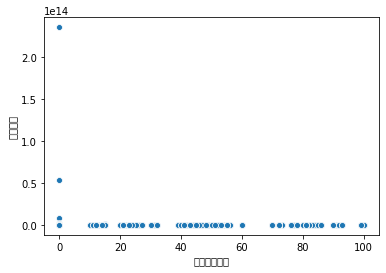

In [28]:
sns.scatterplot(x=test['세부품명내용'], y = test['추정가격'])

In [29]:
test_2 = test.groupby('세부품명내용').agg({'median','count','mean'})['추정가격']

In [30]:
# test.groupby('세부품명내용').median().iplot(kind ='bar')
test_2.head()

,mean,median,count
세부품명내용,,,
0,1.318817e+11,42975900.0,2385
10,5.148304e+07,23909718.0,3382
11,1.527438e+08,51942250.0,1280
12,1.741799e+08,60818645.0,2242
13,6.741390e+08,72090909.0,121


In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '세부품명내용'}
    }
    ,title = '세부품명내용여부에 따른 공고의 평균/중간값 , 갯수'
)

fig.show()

### 특정 부분에 있어서(특정 세부품명에 있어서) 중간값 배정 금액이 큰 것을 확인할 수 있다. 
### (01/28 수정) 그러나, 데이터 수까지 보니, 데이터가 한쪽에 쏠려있는 것을 확인할 수 있다 -> 빼자.

In [35]:
test = df_물품_입찰공고_내역_3[['합계수량','추정가격']].copy()

In [36]:
test_2 = test[test['합계수량'] != 0]

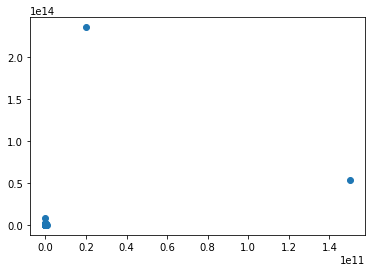

In [37]:
plt.scatter(x=test_2['합계수량'], y = test_2['추정가격']) # 그래프로는 확인하기가 힘들다.. 너무 상대적이다(겹쳐서 보이지가 않는다) -> 상관계수나 heatmap으로 확인해보자.

In [38]:
test_2.corr() 

,합계수량,추정가격
합계수량,1.000000,0.347419
추정가격,0.347419,1.000000


## 0.5... 상관관계가약간 있다 애매하지만, 일단은 넣어보자.

In [39]:
test = df_물품_입찰공고_내역_3[['합계수량_여부','추정가격']].copy()

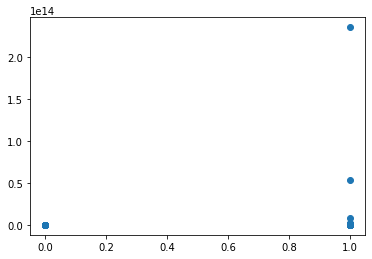

In [40]:
plt.scatter(x=test['합계수량_여부'], y = test['추정가격']) # 이 그림만 봐서는 모르겠다.

In [41]:
test.groupby('합계수량_여부').mean().iplot(kind ='bar')

## 합계수량을 모를때 (0) 가 알때(1) 보다 예정배정금액이 크다는 것을 알 수 있다. 차이가 있으므로 넣는다.

In [42]:
df_물품_입찰공고_내역_3['긴급공고여부'].value_counts()

N       75819
기한존재    17901
Y       17137
Name: 긴급공고여부, dtype: int64

In [43]:
test = df_물품_입찰공고_내역_3[['긴급공고여부','추정가격']].copy()

In [44]:
test.groupby('긴급공고여부').mean().iplot(kind ='bar')

In [45]:
test.groupby('긴급공고여부').median().iplot(kind ='bar')

### 기한이 존재하는 경우, 긴급한 경우가 긴급하지 않은 경우에 비해서 중간값 배정금액이 크다는 것을 알 수 있다.

In [46]:
df_물품_입찰공고_내역_3['정정공고여부'].value_counts()

N       105160
Y         5677
알수없음        20
Name: 정정공고여부, dtype: int64

In [47]:
test = df_물품_입찰공고_내역_3[['정정공고여부','추정가격']].copy()

In [48]:
test.groupby('정정공고여부').median().iplot(kind ='bar') 

In [49]:
test.groupby('정정공고여부').median() # 알수 없음은 그냥 배정금액이 0원임을 알 수 있다.

,추정가격
정정공고여부,
N,5.023500e+07
Y,5.090909e+07
알수없음,1.488636e+10


In [64]:
df_물품_입찰공고_내역_3[df_물품_입찰공고_내역_3['추정가격'] == 0] #

,공고게시일자,등록유형,조달구분,입찰공고차수,수요기관코드,세부품명내용,합계수량,합계수량_여부,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,재입찰허용여부,낙찰자결정방법,입찰계약방법,업종제한내용,지역제한내용,국제입찰여부
75,2021-01-05,나라장터(G2B),자체조달,0,Z007981,42,1.0,1,N,N,N,0.0,직찰,Y,적격심사제,제한(총액),N,N,N
89,2021-01-05,나라장터(G2B),자체조달,0,Z007981,42,1.0,1,N,N,N,0.0,직찰,Y,적격심사제,제한(총액),N,N,N
133,2021-01-06,나라장터(G2B),자체조달,0,7002042,43,23.0,1,N,N,N,0.0,직찰,Y,최저가낙찰자결정,제한(총액),N,Y,N
144,2021-01-07,나라장터(G2B),중앙조달,1,8490000,45,1.0,1,기한존재,N,Y,0.0,전자입찰,Y,알수없음,제한(총액),Y,Y,N
153,2021-01-07,나라장터(G2B),자체조달,0,Z011987,43,113.0,1,N,N,N,0.0,직찰,Y,종합낙찰자결정,일반(총액),N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,2021-12-23,자체전자조달시스템,자체조달,0,B500004,0,0.0,0,N,N,N,0.0,전자입찰,N,적격심사제,일반(총액),N,N,N
110839,2021-12-24,자체전자조달시스템,자체조달,0,B500004,0,0.0,0,N,N,N,0.0,전자입찰,N,적격심사제,제한(총액),N,N,N
110840,2021-12-24,자체전자조달시스템,자체조달,0,B500004,0,0.0,0,N,N,N,0.0,전자입찰,N,적격심사제,일반(총액),N,N,N
110849,2021-12-30,자체전자조달시스템,자체조달,0,B500004,0,0.0,0,N,N,N,0.0,전자입찰,N,희망수량경쟁입찰,일반(단가),N,N,N


## 배정예산이 0원인건 무엇일까? ->> 조사가 필요하다, 데이터수는 일단 적어서 넘어가지만, 향후 조사하도록 하자.
##  별차이가 안난다. 정정공고여부는 빼도 될 듯 하다.

In [76]:
df_물품_입찰공고_내역_4 = df_물품_입찰공고_내역_3[['공고게시일자','등록유형', '조달구분', '입찰공고차수', '수요기관코드', '세부품명내용', '합계수량', '합계수량_여부',
       '긴급공고여부', '취소공고여부', '추정가격', '입찰방식', '재입찰허용여부', '낙찰자결정방법',
       '입찰계약방법', '업종제한내용', '지역제한내용', '국제입찰여부']].copy()

In [77]:
test = df_물품_입찰공고_내역_4[['취소공고여부','추정가격']].copy()

In [78]:
test.head()

,취소공고여부,추정가격
0,N,26400000.0
1,Y,123636363.0
2,Y,63017272.0
3,N,132744545.0
4,N,65272727.0


In [73]:
test['취소공고여부'].value_counts()

N    104048
Y      6809
Name: 취소공고여부, dtype: int64

In [74]:
test.groupby('취소공고여부').median()

,추정가격
취소공고여부,
N,50000000.0
Y,58520000.0


In [75]:
test.groupby('취소공고여부').median().iplot(kind ='bar') 

## 어느정도 차이가 있다. 그런데 의문점이 있다 취소공고여부가 이 입찰은 취소되었다는 뜻인가 아니면, 취소된다는 것을 알려준다는 의미인가? 갯수로 생각하면 취소된것으로 생각할 수 있다. 그러므로 일단은 취소 Y 인 경우는 빼고 생각하자.

In [79]:
df_물품_입찰공고_내역_5 = df_물품_입찰공고_내역_4[df_물품_입찰공고_내역_4['취소공고여부'] == 'N'].copy()

In [84]:
test = df_물품_입찰공고_내역_5[['입찰방식','추정가격']].copy()

In [85]:
test_2 = test.groupby('입찰방식').agg({'mean','median','count'})

In [86]:
test_3 = test_2['추정가격'].copy()

In [87]:
test_3

,count,median,mean
입찰방식,,,
우편/상시,183,7.272727e+07,1.130129e+08
전자시담,8888,2.363636e+08,1.361018e+09
전자시담(다자간),175,8.181818e+07,5.520822e+09
전자입찰,88637,4.427054e+07,2.448964e+08
전자입찰/직찰,4,7.469767e+09,7.469767e+09
직찰,5149,3.900000e+07,6.131071e+10
직찰/우편,363,8.036000e+07,1.729019e+08
직찰/우편/상시,649,6.363636e+07,1.003906e+08


In [88]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_3.index, y=test_3['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_3.index, y=test_3['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_3.index, y=test_3['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '입찰방식'}
    }
    ,title = '입찰방식에 따른 공고의 평균/중간값 , 갯수'
)

fig.show()


### 특수한 경우에 대해서(전자입찰/직찰)에서 평균값이 매우 높은것을 알 수 있다. 근데 중간값은 0이다. 애매하다. 이 변수가 의미가 있는 것일까? 일단 전자입찰/직찰이랑 직찰, 전자입찰과의 차이가 무엇일까? 의문점이다.


### (수정 01/28) 데이터가 한쪽에 너무 쏠려있으므로, 일단 빼자

In [90]:
test = df_물품_입찰공고_내역_5[['재입찰허용여부','추정가격']].copy()

In [91]:
test['재입찰허용여부'].value_counts() #10배차이난다.

Y       87638
N       16096
알수없음      314
Name: 재입찰허용여부, dtype: int64

In [93]:
test_2 = test.groupby('재입찰허용여부').agg({'mean','median','count'})['추정가격']

In [94]:
test_2

,count,median,mean
재입찰허용여부,,,
N,16096,5.454545e+07,3.489328e+08
Y,87638,4.922500e+07,3.514681e+08
알수없음,314,9.090909e+09,1.000697e+12


In [95]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '재입찰허용여부'}
    }
    ,title = '재입찰허용여부에 따른 공고의 평균/중간값 , 갯수'
)

fig.show()

## 재입찰허용여부에 따라서 별로 차이점이 없다 (Y/N 간 차이가 별로 없음) 그러므로 빼도 된다.

In [98]:
df_물품_입찰공고_내역_6 = df_물품_입찰공고_내역_5[['공고게시일자','등록유형', '조달구분', '입찰공고차수', '수요기관코드', '세부품명내용', '합계수량', '합계수량_여부',
       '긴급공고여부', '추정가격', '입찰방식', '낙찰자결정방법',
       '입찰계약방법', '업종제한내용', '지역제한내용', '국제입찰여부']].copy()

In [99]:
df_물품_입찰공고_내역_6.columns

Index(['공고게시일자', '등록유형', '조달구분', '입찰공고차수', '수요기관코드', '세부품명내용', '합계수량',
       '합계수량_여부', '긴급공고여부', '추정가격', '입찰방식', '낙찰자결정방법', '입찰계약방법', '업종제한내용',
       '지역제한내용', '국제입찰여부'],
      dtype='object')

In [100]:
test = df_물품_입찰공고_내역_6[['낙찰자결정방법','추정가격']].copy()

In [101]:
test['낙찰자결정방법'].value_counts()

제한적최저가               41900
적격심사제                33800
수의                   11081
중기간 경쟁물품 계약이행능력심사     5861
최저가낙찰자결정              4107
협상에 의한 낙찰자 결정         3848
알수없음                  1630
기타                     654
다수공급자계약에의한 낙찰자 결정      326
종합낙찰자결정                320
희망수량경쟁                 233
2단계입찰                  142
희망수량경쟁입찰                88
경쟁적 대화에 의한 낙찰자 결정       58
Name: 낙찰자결정방법, dtype: int64

In [102]:
test_2 = test.groupby('낙찰자결정방법').agg({'mean','median','count'})['추정가격']

In [103]:
test_2

,count,median,mean
낙찰자결정방법,,,
2단계입찰,142,0.000000e+00,1.238278e+08
경쟁적 대화에 의한 낙찰자 결정,58,1.363636e+07,1.679778e+08
기타,654,5.454545e+07,4.002984e+08
다수공급자계약에의한 낙찰자 결정,326,8.265200e+09,9.638641e+11
수의,11081,1.645391e+08,1.136985e+09
알수없음,1630,2.530370e+08,2.732488e+08
적격심사제,33800,8.000000e+07,3.994777e+08
제한적최저가,41900,2.962045e+07,3.720846e+07
종합낙찰자결정,320,5.715909e+07,1.303187e+08


In [104]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '낙찰자결정방법'}
    }
    ,title = '낙찰자결정방법의 종류에 따른 평균/중간값 , 갯수'
)

fig.show()

## 일부 낙찰자결정방법에 데이터가 쏠려있기는 하지만, 쏠려 있는 부분에서도 가격의 차이가 나는 것을 확인할 수 있다. 넣으면 될 듯 하다. 

In [107]:
test = df_물품_입찰공고_내역_6[['입찰계약방법','추정가격']].copy()

In [108]:
test_2 = test.groupby('입찰계약방법').agg({'mean','median','count'})['추정가격']

In [109]:
test_2

,count,median,mean
입찰계약방법,,,
수의(3자단가),1,1.784984e+09,1.784984e+09
수의(단가),6995,2.110909e+07,1.383260e+09
수의(총액),39840,3.648043e+07,1.165349e+08
일반(3자단가),338,5.577880e+09,9.023491e+11
일반(단가),1172,1.324485e+08,2.487072e+09
일반(총액),11197,1.890909e+08,7.449511e+08
제한(3자단가),65,2.615533e+09,1.743357e+11
제한(단가),10200,2.804030e+05,1.040540e+08
제한(총액),32850,8.676636e+07,2.253941e+08


In [110]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '입찰계약방법'}
    }
    ,title = '입찰계약방법 종류에 따른 평균/중간값 , 갯수'
)

fig.show()

### 일부 입찰계약방법에 데이터가 쏠려있기는 하지만, 쏠려 있는 부분에서도 가격의 차이가 나는 것을 확인할 수 있다. 넣으면 될 듯 하다

In [111]:
test = df_물품_입찰공고_내역_6[['업종제한내용','추정가격']].copy()

In [112]:
test_2 = test.groupby('업종제한내용').agg({'mean','median','count'})['추정가격']

In [113]:
test_2

,count,median,mean
업종제한내용,,,
N,70555,54545454.0,4.880963e+09
Y,33493,42574472.0,1.869264e+08


In [114]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '업종제한내용'}
    }
    ,title = '업종제한내용 여부에 따른 평균/중간값 , 갯수'
)

fig.show()

## 업종제한내용 여부에 따라서 차이가 난다. 넣자.


In [115]:
test = df_물품_입찰공고_내역_6[['지역제한내용','추정가격']].copy()

In [116]:
test_2 = test.groupby('지역제한내용').agg({'mean','median','count'})['추정가격']

In [117]:
test_2

,count,median,mean
지역제한내용,,,
N,48505,93039000.0,7.166243e+09
Y,55543,32550000.0,5.470473e+07


In [118]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '지역제한내용'}
    }
    ,title = '지역제한내용 여부에 따른 평균/중간값 , 갯수'
)

fig.show()

### 분명한 차이를 보인다. 지역제한내용은 넣자.

In [121]:
test = df_물품_입찰공고_내역_6[['국제입찰여부','추정가격']].copy()

In [122]:
test_2 = test.groupby('국제입찰여부').agg({'mean','median','count'})['추정가격']

In [123]:
test_2 # 

,count,median,mean
국제입찰여부,,,
N,103401,49700000.0,3.341801e+09
Y,647,652770409.0,7.869402e+09


In [124]:
fig = go.Figure()

fig.add_trace(go.Bar(name= 'mean',x=test_2.index, y=test_2['mean'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'median',x=test_2.index, y=test_2['median'], yaxis='y', offsetgroup=1))
fig.add_trace(go.Bar(name= 'count', x=test_2.index, y=test_2['count'], yaxis='y2', offsetgroup=2))


fig.update_layout({
        'yaxis': {'title': '금액'},
        'yaxis2': {'title': '갯수', 'overlaying': 'y', 'side': 'right'},
        'xaxis' : {'title' : '국제입찰여부'}
    }
    ,title = '국제입찰여부 여부에 따른 평균/중간값 , 갯수'
)

fig.show()

### 차이가 많이 난다.. 데이터 수가 치우쳐 있기는 하지만 일단은 넣자.
### (수정 01/28) 데이터가 한쪽에 쏠려 있으므로, 의미가 없다. 빼자. 학습시키는데 시간만 소비한다.

In [126]:
df_물품_입찰공고_내역_6 = df_물품_입찰공고_내역_6[['공고게시일자', '등록유형', '조달구분', '입찰공고차수', '수요기관코드', '합계수량',
       '합계수량_여부', '긴급공고여부', '추정가격', '낙찰자결정방법', '입찰계약방법', '업종제한내용',
       '지역제한내용']].copy()

In [127]:
lst_all = []
for i in df_물품_입찰공고_내역_6.columns:
    lst_all.append(len(df_물품_입찰공고_내역_6[i].value_counts().index))
    
    

In [128]:
df_물품_입찰공고_내역_6.columns

Index(['공고게시일자', '등록유형', '조달구분', '입찰공고차수', '수요기관코드', '합계수량', '합계수량_여부',
       '긴급공고여부', '추정가격', '낙찰자결정방법', '입찰계약방법', '업종제한내용', '지역제한내용'],
      dtype='object')

In [129]:
df_물품_입찰공고_내역_6.shape

(104048, 13)

In [130]:
# df_물품_입찰공고_내역_6.to_csv('Project_01_27_EDA_물품_1.csv',encoding = 'cp949')


In [131]:
# df_물품_입찰공고_내역_6.to_csv('Project_01_27_EDA_물품_1_test.csv',encoding = 'cp949') # test 데이터시

In [132]:
df_물품_입찰공고_내역_6['수요기관코드'].value_counts().iplot(kind = 'hist')